import package yang digunakan

In [7]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk 
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from textblob import TextBlob
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Load dari hasil crawling yang telah didapatkan (dalam bentuk csv) :

In [35]:
kolom = ['user','date','text','latitude','longitude']
df = pd.read_csv('coba1.csv')
df.head(8000)

,user,date,text,latitude,longitude
0,Roebucknw3,Tue Aug 13 12:28:21 +0000 2019,188th Birthday Celebration from 19-20th Septe...,51.507115,-0.127318
1,We_love_vintage,Tue Aug 13 12:27:11 +0000 2019,Last 3 Burberry macs/trench coats left from th...,51.507115,-0.127318
2,iam_kzh,Tue Aug 13 12:20:58 +0000 2019,I've seen this musical two times in Japan. But...,51.511600,-0.119750
3,JojoDesmond,Tue Aug 13 12:18:25 +0000 2019,TONIGNT 100wardourst #soholondon I’m performin...,51.513595,-0.133882
4,Nv62x,Tue Aug 13 12:17:50 +0000 2019,I'm at @TheLondonEye in Lambeth Greater Londo...,51.503287,-0.119594
5,raissafolly,Tue Aug 13 12:14:42 +0000 2019,🔴 em London United Kingdom https://t.co/mnQn5...,51.507115,-0.127318
6,tmj_lon_jobs,Tue Aug 13 12:11:16 +0000 2019,If you're looking for work in #London England...,51.507351,-0.127758
7,lugabreeel,Tue Aug 13 12:09:35 +0000 2019,Just posted a photo @ London United Kingdom h...,51.507115,-0.127318
8,lugabreeel,Tue Aug 13 12:08:49 +0000 2019,Just posted a photo @ London United Kingdom h...,51.507115,-0.127318
9,tmj_lon_art,Tue Aug 13 12:06:35 +0000 2019,This job might be a great fit for you: Interio...,51.507351,-0.127758


Menghapus kolom yang tidak dibutuhkan

In [36]:
df.drop(['user','latitude','longitude'], axis = 1, inplace = True)

In [37]:
df.head()

,date,text
0,Tue Aug 13 12:28:21 +0000 2019,188th Birthday Celebration from 19-20th Septe...
1,Tue Aug 13 12:27:11 +0000 2019,Last 3 Burberry macs/trench coats left from th...
2,Tue Aug 13 12:20:58 +0000 2019,I've seen this musical two times in Japan. But...
3,Tue Aug 13 12:18:25 +0000 2019,TONIGNT 100wardourst #soholondon I’m performin...
4,Tue Aug 13 12:17:50 +0000 2019,I'm at @TheLondonEye in Lambeth Greater Londo...


Menghapus karakter (exp : @,#,!,0-9, dll) dan memisahkan perkata

In [42]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['text_punct'] = df['text'].apply(lambda x: remove_punct(x))

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['text tokenized'] = df['text_punct'].apply(lambda x: tokenization(x.lower()))
df.head(8000)

,date,text,text_punct,text tokenized
0,Tue Aug 13 12:28:21 +0000 2019,188th Birthday Celebration from 19-20th Septe...,th Birthday Celebration from th September bo...,"[th, birthday, celebration, from, th, septembe..."
1,Tue Aug 13 12:27:11 +0000 2019,Last 3 Burberry macs/trench coats left from th...,Last Burberry macstrench coats left from the ...,"[last, burberry, macstrench, coats, left, from..."
2,Tue Aug 13 12:20:58 +0000 2019,I've seen this musical two times in Japan. But...,Ive seen this musical two times in Japan But f...,"[ive, seen, this, musical, two, times, in, jap..."
3,Tue Aug 13 12:18:25 +0000 2019,TONIGNT 100wardourst #soholondon I’m performin...,TONIGNT wardourst soholondon I’m performing wi...,"[tonignt, wardourst, soholondon, i, m, perform..."
4,Tue Aug 13 12:17:50 +0000 2019,I'm at @TheLondonEye in Lambeth Greater Londo...,Im at TheLondonEye in Lambeth Greater London ...,"[im, at, thelondoneye, in, lambeth, greater, l..."
5,Tue Aug 13 12:14:42 +0000 2019,🔴 em London United Kingdom https://t.co/mnQn5...,🔴 em London United Kingdom httpstcomnQnyBIWO,"[, em, london, united, kingdom, httpstcomnqnyb..."
6,Tue Aug 13 12:11:16 +0000 2019,If you're looking for work in #London England...,If youre looking for work in London England ...,"[if, youre, looking, for, work, in, london, en..."
7,Tue Aug 13 12:09:35 +0000 2019,Just posted a photo @ London United Kingdom h...,Just posted a photo London United Kingdom ht...,"[just, posted, a, photo, london, united, kingd..."
8,Tue Aug 13 12:08:49 +0000 2019,Just posted a photo @ London United Kingdom h...,Just posted a photo London United Kingdom ht...,"[just, posted, a, photo, london, united, kingd..."
9,Tue Aug 13 12:06:35 +0000 2019,This job might be a great fit for you: Interio...,This job might be a great fit for you Interior...,"[this, job, might, be, a, great, fit, for, you..."


Mengambril daftar stopword dari packgace stopwod yang sudah di import

In [43]:
stopword = nltk.corpus.stopwords.words('english')

Menghapus kata stopword dalam tweet 

In [44]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['stopwords'] = df['text tokenized'].apply(lambda x: remove_stopwords(x))
df.head(8000)

,date,text,text_punct,text tokenized,stopwords
0,Tue Aug 13 12:28:21 +0000 2019,188th Birthday Celebration from 19-20th Septe...,th Birthday Celebration from th September bo...,"[th, birthday, celebration, from, th, septembe...","[th, birthday, celebration, th, september, boo..."
1,Tue Aug 13 12:27:11 +0000 2019,Last 3 Burberry macs/trench coats left from th...,Last Burberry macstrench coats left from the ...,"[last, burberry, macstrench, coats, left, from...","[last, burberry, macstrench, coats, left, late..."
2,Tue Aug 13 12:20:58 +0000 2019,I've seen this musical two times in Japan. But...,Ive seen this musical two times in Japan But f...,"[ive, seen, this, musical, two, times, in, jap...","[ive, seen, musical, two, times, japan, first,..."
3,Tue Aug 13 12:18:25 +0000 2019,TONIGNT 100wardourst #soholondon I’m performin...,TONIGNT wardourst soholondon I’m performing wi...,"[tonignt, wardourst, soholondon, i, m, perform...","[tonignt, wardourst, soholondon, performing, f..."
4,Tue Aug 13 12:17:50 +0000 2019,I'm at @TheLondonEye in Lambeth Greater Londo...,Im at TheLondonEye in Lambeth Greater London ...,"[im, at, thelondoneye, in, lambeth, greater, l...","[im, thelondoneye, lambeth, greater, london, h..."
5,Tue Aug 13 12:14:42 +0000 2019,🔴 em London United Kingdom https://t.co/mnQn5...,🔴 em London United Kingdom httpstcomnQnyBIWO,"[, em, london, united, kingdom, httpstcomnqnyb...","[, em, london, united, kingdom, httpstcomnqnyb..."
6,Tue Aug 13 12:11:16 +0000 2019,If you're looking for work in #London England...,If youre looking for work in London England ...,"[if, youre, looking, for, work, in, london, en...","[youre, looking, work, london, england, check,..."
7,Tue Aug 13 12:09:35 +0000 2019,Just posted a photo @ London United Kingdom h...,Just posted a photo London United Kingdom ht...,"[just, posted, a, photo, london, united, kingd...","[posted, photo, london, united, kingdom, https..."
8,Tue Aug 13 12:08:49 +0000 2019,Just posted a photo @ London United Kingdom h...,Just posted a photo London United Kingdom ht...,"[just, posted, a, photo, london, united, kingd...","[posted, photo, london, united, kingdom, https..."
9,Tue Aug 13 12:06:35 +0000 2019,This job might be a great fit for you: Interio...,This job might be a great fit for you Interior...,"[this, job, might, be, a, great, fit, for, you...","[job, might, great, fit, interior, designer, h..."


Range data yang olah

In [27]:
print(f" Data Available since {df.date.min()}")
print(f" Data Available upto {df.date.max()}")

 Data Available since 2019-08-04 08:16:09+00:00
 Data Available upto 2019-08-13 12:28:21+00:00


Mengeluarkan Hasil dalam Bentuk Grafik

2019-08-04    745
2019-08-05    931
2019-08-06    916
2019-08-07    884
2019-08-08    773
2019-08-09    869
2019-08-10    790
2019-08-11    877
2019-08-12    863
2019-08-13    366
Name: date, dtype: int64


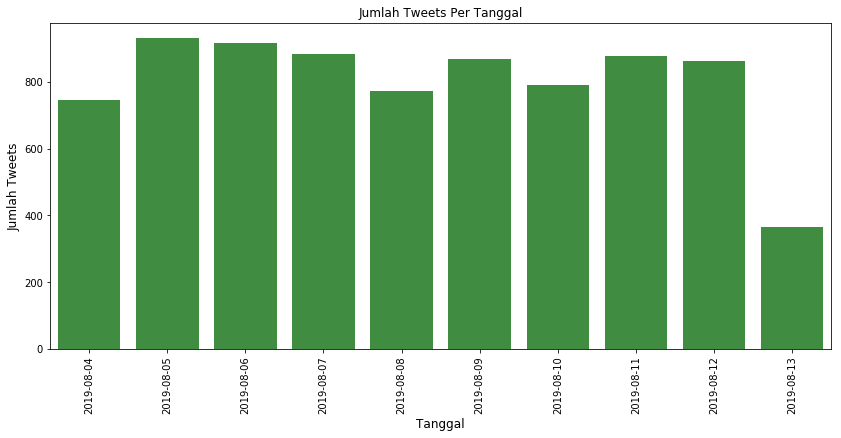

In [45]:
df['date'] =  pd.to_datetime(df['date'])
cnt_srs = df['date'].dt.date.value_counts() #menghitung jumlah tweeet perhari
cnt_srs = cnt_srs.sort_index() 

#plot untuk grafik
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Tweets', fontsize=12)
plt.title("Jumlah Tweets Per Tanggal")

print(cnt_srs)

Menghitung rata-rata tweet dalam sepekan terakhir di London

In [46]:
print(cnt_srs.values.mean())

801.4


Menghitung jumlah tweets per menit

In [48]:
cnt_ = df['date'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Jumlah tweets per Menit',
              xaxis= dict(title= 'Tweets per minute',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Visualisasi Text

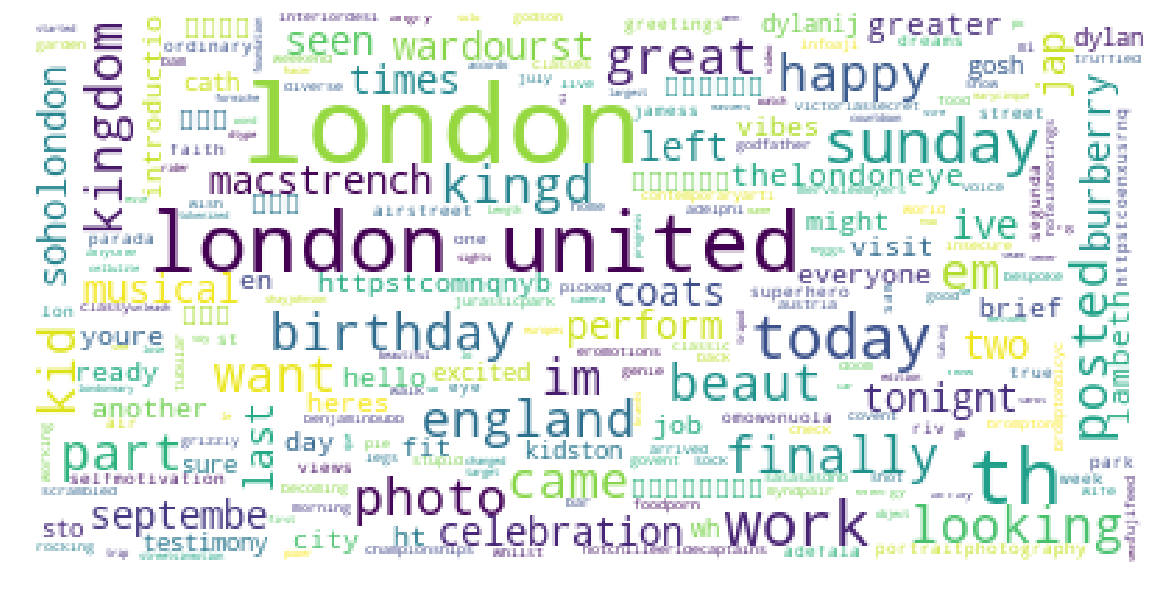

0       [th, birthday, celebration, from, th, septembe...
1       [last, burberry, macstrench, coats, left, from...
2       [ive, seen, this, musical, two, times, in, jap...
3       [tonignt, wardourst, soholondon, i, m, perform...
4       [im, at, thelondoneye, in, lambeth, greater, l...
5       [, em, london, united, kingdom, httpstcomnqnyb...
6       [if, youre, looking, for, work, in, london, en...
7       [just, posted, a, photo, london, united, kingd...
8       [just, posted, a, photo, london, united, kingd...
9       [this, job, might, be, a, great, fit, for, you...
10      [hello, everyone, heres, a, brief, introductio...
11      [off, day, visit, to, london, city, ready, to,...
12      [london, vibes, à, london, united, kingdom, ht...
13      [سبب, وجود, القوانين, بين, الأخوة, نزل, الفلوق...
14      [another, testimony, gosh, i, m, not, sure, wh...
15      [excited, to, be, part, of, cath, kidston, sto...
16      [dylan, dylanij, london, portraitphotography, ...
17      [be, y

In [49]:
wordcloud__ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=8000,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['text tokenized'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

print(str(df['text tokenized'].dropna()))